### `tn.movies_budget.csv`
In this section we are going to prepare our data for analysis. In the previous section, we did a data exploration to understand out data better. We found that the `tn.movie_budgets.csv` file was mostly clean, with no null values and duplicates. However, the data contains numerical values stored as objects. 

To ensure the data is appropriate for analysis, we are going to convert the numerical values to integers enable proper calculations, aggregations, and statistical analysis.
Additionally, the `release_date` column contains dates stored as objects, therefore we are going to convert the column to a datetime datatype.

This process will involve;
- Data reformatting

- Data convertion 

- Renaming

In [567]:
# Importing the necessary libraries for analysis.

import pandas as pd
import numpy as np
import sqlite3
import string as str
import seaborn as sns
import matplotlib.pyplot as plt



In [568]:
# Reading the file into the variable 'movie_budgets'.
movie_budgets = pd.read_csv("Data/tn.movie_budgets.csv.gz", compression= 'gzip', delimiter= ',', encoding= 'latin-1', index_col= False)

movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


#### Data conversion
In this section we are going to convert numerical data and dates stored as objects to integers and dates respectively.

In [569]:
# We are confirming the data types of each columns.

movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The above code confirms our findings in the previous section.

In [570]:
# Before converting the numerical columns to integers, we are first going to strip the dollar sign ($) and replace the commas with nothing.
# The dollar sign and commas are characters, therefore the code will throw an error if we try to convert the columns without stripping and replacing the sign and the punctuation mark.

columns_to_strip = ['production_budget', 'domestic_gross', 'worldwide_gross']

movie_budgets[columns_to_strip] = movie_budgets[columns_to_strip].apply(lambda x: x.str.strip('$'))

movie_budgets[columns_to_strip] = movie_budgets[columns_to_strip].apply(lambda x: x.str.replace(',', ''))



In [571]:
# Validation that the code has worked

movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [572]:
# Converting production_budget, domestic_gross and worldwide_gross to integers
# We are using the .astype() method to convert them.
# The reason we cannot convert all of them at the same time, 'pd.to_numeric' only accepts series, lists, tuples and arrays.

movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'], errors='coerce').astype('Int64')

movie_budgets['domestic_gross'] = pd.to_numeric(movie_budgets['domestic_gross'], errors='coerce').astype('Int64')

movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'], errors='coerce').astype('Int64')

In [573]:
# By stripping the dollar sign from the rows, it is difficult to know the currency of the revenues.
# In this code we are going to add the currency to the columns.

movie_budgets.rename(columns={'production_budget': 'production_budget($)', 'domestic_gross': 'domestic_gross($)', 'worldwide_gross': 'worldwide_gross($)'}, inplace=True)

In [574]:
# The next step is converting release_date to date. This is essential for year on year (YoY) analysis on both the revebues and further analysis. 

movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [575]:
# Validating that the changes we've made have reflected.
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5782 non-null   int64         
 1   release_date          5782 non-null   datetime64[ns]
 2   movie                 5782 non-null   object        
 3   production_budget($)  5782 non-null   Int64         
 4   domestic_gross($)     5782 non-null   Int64         
 5   worldwide_gross($)    5782 non-null   Int64         
dtypes: Int64(3), datetime64[ns](1), int64(1), object(1)
memory usage: 288.1+ KB


In [576]:
movie_budgets.head()

,id,release_date,movie,production_budget($),domestic_gross($),worldwide_gross($)
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [577]:
# For analysis purposes, we are going to create another dataframe just for project budget

production_budgets = movie_budgets[['movie', 'production_budget($)']]

Now we have a cleaned data with the appropriate data types and easy to interpret columns.

### `bom.movie_gross`
In the previous section, we carried out data exploration which led us to the conclusion that the `bom.movie_gross.csv` file was mostly clean, despite having several null values and the data contains numerical values stored as objects. 

To ensure the data is appropriate for analysis, we are going to convert the numerical values to integers enable proper calculations, aggregations, and statistical analysis.
Additionally, the `release_date` column contains dates stored as objects, therefore we are going to convert the column to a datetime datatype.

This process will involve;
- Data cleaning

- Data convertion 

- Renaming


In [578]:
# # Reading the file into the variable 'movie_budgets'.

movie_gross = pd.read_csv("Data/bom.movie_gross.csv.gz", compression= 'gzip', delimiter= ',', encoding= 'latin-1', index_col= False)
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [579]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the code above we identify that the foreign_gross column contains numerical values stored as objects. In the next code we are going to convert that column to a float.

In [580]:
# Before converting the numerical columns to floats, we are first going to replace the commas with nothing.
# The commas are characters, therefore the code will throw an error if we try to convert the columns without replacing it.

movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',', '').astype('float')

#### Data combination
Before we drop null values in this data, we are going to concatenate the `movie_budgets` and the `movie_gross` dataframes tp obtain all possible data that both have to offer.

In [581]:
# First we are going to filter data that exist in both dataframes

movie_gross['in_budgets'] = movie_budgets['movie'].isin(movie_gross['title'])


In [582]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,in_budgets
0,Toy Story 3,BV,415000000.0,652000000.0,2010,False
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,True
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,False
3,Inception,WB,292600000.0,535700000.0,2010,True
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,False


In [583]:
movie_gross['in_budgets'].value_counts()

False    2491
True      896
Name: in_budgets, dtype: int64

In [584]:
not_in_budget = movie_gross[movie_gross['in_budgets'] == False]
not_in_budget.shape

(2491, 6)

In [585]:
# First we are going to identify the columns we want to extract in each DataFrame
target_columns = {
    'title': ['title', 'movie'],
    'domestic_gross($)': ['domestic_gross($)', 'domestic_gross'],
    'worldwide_gross($)': ['worldwide_gross($)', 'foreign_gross']
}

# Function to standardize columns in any DataFrame
def standardize_columns(df, col_map):
    new_df = pd.DataFrame()
    for target_col, options in col_map.items():
        for col in options:
            if col in df.columns:
                new_df[target_col] = df[col]
                break  # stop at the first match
        if target_col not in new_df.columns:
            new_df[target_col] = pd.NA  # fill with NA if not found
    return new_df

# Apply the standardization to each DataFrame
clean_gross = standardize_columns(not_in_budget, target_columns)
clean_budgets = standardize_columns(movie_budgets, target_columns)

# Concatenate both standardized DataFrames
combined_movie_revenues = pd.concat([clean_gross, clean_budgets], ignore_index=True)

# Final result
combined_movie_revenues.head()

,title,domestic_gross($),worldwide_gross($)
0,Toy Story 3,4.15e+08,6.52e+08
1,Harry Potter and the Deathly Hallows Part 1,2.96e+08,6.643e+08
2,Shrek Forever After,2.387e+08,5.139e+08
3,The Twilight Saga: Eclipse,3.005e+08,3.98e+08
4,Tangled,2.008e+08,3.91e+08


In [586]:
combined_movie_revenues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8273 entries, 0 to 8272
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               8273 non-null   object
 1   domestic_gross($)   8251 non-null   object
 2   worldwide_gross($)  7254 non-null   object
dtypes: object(3)
memory usage: 194.0+ KB


In [587]:
# Now we continue cleaning the data
# first we convert the numerical values stored as objects to floats

combined_movie_revenues[['domestic_gross($)', 'worldwide_gross($)']] = combined_movie_revenues[['domestic_gross($)', 'worldwide_gross($)']].astype('float')

# Next we are going to deal with our missing values, but right after checking if the movie titles in this dataframe exists in another dataframe for analysis purposes.

In [588]:
combined_movie_revenues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8273 entries, 0 to 8272
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               8273 non-null   object 
 1   domestic_gross($)   8251 non-null   float64
 2   worldwide_gross($)  7254 non-null   float64
dtypes: float64(2), object(1)
memory usage: 194.0+ KB


### `im.db` data preparation
In this section, we are going to clean the `im.db` database. In the previous section, we explored the database and realized that several tables contained unusable data ranging from null values to duplicates. In this section we are going to go table by table, exploring what else needs cleaning or formatting.

First, we are going to take a look at the database's ERD

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/main/movie_data_erd.jpeg)

From this diagram, we are going to 

In [589]:
# Connecting the database and reading it into the `conn` variable 
conn = sqlite3.connect('Data/im.db')

# In this code we are reading the tables into get the lay of the database
tables = pd.read_sql("""SELECT *
                      FROM sqlite_master""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


#### `movie_basics`
After exploring this table in the previous section, we found that it contains 146144 rows and 6 columns. Out of the 6 columns, 3 contain null values. In this section we are going to clean this data by dropping or replacing null values depending on the relevance of the column. We will also explore further to uncover any data quality issues that were missed in the previous section. 


In [590]:
# Using the sqlite3 library, we are going to query the movie_basics table, selecting everything.
movie_basics = pd.read_sql("""SELECT *
                               FROM movie_basics""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [591]:
# This code gives us the overview of the table, showing us the columns, datatypes and how many null values the table has.
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The code above proves what the initial exploration pointed out. It also reveals that the `start_year` column is stored as an object but it is a datetime data type. 

In the next couple of codes we are going to;
- deal with the missing values 

- perform data conversion.

In [592]:
# We are aware of the columns that have missing values, but to make good decisions, we are looking at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.
missing = movie_basics.isnull().sum()

missing[missing > 0].sort_values(ascending=False)

runtime_minutes    31739
genres              5408
original_title        21
dtype: int64

As I mentioned before, we are going to decide how to deal with missing values depending on the relevance of the columns and the number of missing values. From the above code, we notice that we do not have a lot of missing values, when it comes to the columns' relevance, all of them are crucial for the analysis ahead, therefore we are going to replace some and drop others.

`runtime_minutes`

This column contains 31739 missing values, for this column we are going to replace the missing values with the median value of the column. This is because this will less likely influence the distribution of the data while also preventing the loss of valueable data.

In [593]:
# This code is replacing all the missing values in the `runtime_minutes` column with the median of the column. 
# The reason we use this method is because runtime enatils important information crucial to our analysis. 
# This decision is also better than dropping the rows as it is less likely to influence the distribution. 

movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].median(), inplace= True)

`original_title`

This column only contains 21 missing values, while it is okay to drop those rows, replacing the null values with corresponding data from the `primary_title` seems appropriate.

In [594]:
# Most of the rows in the table contain the same entries in both the `original_title` and the `primary_title`.
# This code simply fills the null values in the `original_title` column with corresponding data from the `primary_title` column.
 
movie_basics['original_title'] = movie_basics['original_title'].fillna(movie_basics['primary_title'])

`genres`

Containing 5408 missing values, there is no other way to deal with these missing values other than to drop them. We are using the .dropna() method and specifying the rows we need dropped are from what column.

In [595]:
# For the `genres` column, we decided to drop the null values as there is no way to replace them and dropping them is less likely to cause data loss.

movie_basics = movie_basics.dropna(subset= ['genres'])

In [596]:
# Validation that we have dealt with all the null values.

missing = movie_basics.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

Next, we are dealing with data conversion from object to datetime. When dates are stored as objects, pandas cannot perform date-specific operations such as calculating time differences, extracting date components, or resampling time series data. Converting to datetime enables these functionalities.

In [597]:
movie_basics['start_year'] = movie_basics['start_year'].astype('int')

<ipython-input-597-9e033c94b1b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_basics['start_year'] = movie_basics['start_year'].astype('int')


In [598]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         140736 non-null  object 
 1   primary_title    140736 non-null  object 
 2   original_title   140736 non-null  object 
 3   start_year       140736 non-null  int32  
 4   runtime_minutes  140736 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 7.0+ MB


#### `directors`
Prior investigations found that this table contains 127639 duplicate records. In this section we are going to explore the table further and determine whether the data are indeed duplicates or just contain the same ids as the table only contains ids.

This process will include;
- Dropping duplicates

First, we are reading the table into the `directors` dataframe using pandas read_sql() function. 

In [599]:
# Using the sqlite3 library, we are going to query the directors table, selecting everything.
directors = pd.read_sql("""SELECT *
                           FROM directors""", conn)

directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [600]:
# This code helps us understand the structure of our table

directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


Confirming that the data contains duplicates, we are using the .duplicated() function to return booleans of all the rows that contain duplicates and the .sum() function to count them.

In [601]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = directors.duplicated().sum()
duplicates

127639

To decide the next cause of action, we are examining the duplicate records further to make sure we will not be dropping data that are not in fact, duplicated. We are filtering the duplicated records and storing them in the `all_duplicate_rows` variable.

In [602]:
# We are filtering out duplicated data and storing them in a variable for further inspection.

all_duplicate_rows = directors[directors.duplicated(keep=False)]
print(all_duplicate_rows)

         movie_id   person_id
2       tt0835418   nm0151540
3       tt0835418   nm0151540
8       tt0996958   nm2286991
9       tt0996958   nm2286991
10      tt0999913   nm0527109
...           ...         ...
291160  tt8992390   nm0504267
291161  tt8992390   nm0504267
291162  tt8992390   nm0504267
291167  tt8999892  nm10122247
291168  tt8999892  nm10122247

[182316 rows x 2 columns]


The code above clarifies that the table truly contains duplicate records. The next cause of action is deleting the duplicates. Dropping them is essential as duplicate data negatively impacts data quality, analysis, and overall business operations. It can lead to inaccuracies in reporting, skewed insights, and ultimately hinders informed decision-making. 

In [603]:
# To prevent the duplicates from negatively impacting the data, we are dropping them using the .drop_duplicates() function.

directors = directors.drop_duplicates()

In [604]:
# Finally, to validate the codes, we are using the .duplicated() and .sum() functions to count the number of duplicated records, confirming that the number is 0

duplicates = directors.duplicated().sum()
duplicates

0

#### `known_for`
According to the previous section, this table is mostly clean and has no data quality issues.

In [605]:
# Using the sqlite3 library, we are going to query the known_for table, selecting everything.

known_for = pd.read_sql("""SELECT *
                           FROM known_for""", conn)

known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [606]:
# Checking for other data quality issues.

known_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


The data is clean and ready for analysis.

#### `movie_akas`
From the previous section, we found that this table, which contains 331703 rows and 8 columns, has null values in 5 columns. In this section we are going to deal with the null values and also explore the data further to make sure there are no other quality issues.

This process will include;
- Dropping rows/ columns

In the code below, we are querying the mavie_akas table to access everything for inspection.

In [607]:
# Using the sqlite3 library, we are going to query the movie_akas table, selecting everything.

movie_akas = pd.read_sql("""SELECT *
                            FROM movie_akas""", conn)

movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [608]:
# We are trying to understand the structure of the table.

movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [609]:
# From the code above, as well as the previous section, we see that the table contains several null values.
# This code checks for null values in each column and finds their percentage. It then filters out columns with no missing values and returns those with null values.

missing = movie_akas.isnull().mean()*100

missing[missing > 0].sort_values(ascending=False)

attributes           95.500493
language             87.423991
types                49.217523
region               16.066481
is_original_title     0.007537
dtype: float64

The `attributes` column is missing 95% of its records, the `language` column is missing 87% of its records and the `types` column is missing almost half of its records. According to the rule of thumb, in instances of very large missing datasets, it is better to drop the whole column that to lose all that valuable data.

So, in the next code, we are going to use the .dropna() functions to drop these columns.

In [610]:
# In this code we are dropping columns with large missing values. 
# That includes the attributes, language and types columns.
# We are using the .drop() function and the axis=1 attribute to specify that the things being dropped are columns

movie_akas = movie_akas.drop(['attributes', 'language', 'types'], axis=1)

In [611]:
# This code asserts that we have dropped the three columns

movie_akas.head()

,movie_id,ordering,title,region,is_original_title
0,tt0369610,10,Джурасик свят,BG,0.0
1,tt0369610,11,Jurashikku warudo,JP,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,0.0
4,tt0369610,14,Jurassic World,FR,0.0


In [612]:
# For the rest of the columns conatining null values, we are going to drop the rows because there is no way to fill them.
# We are using the .dropna() function.

movie_akas = movie_akas.dropna(subset= ['is_original_title', 'region'])

In [613]:
# This code asserts that we have dropped all rows conatining null values.

missing = movie_akas.isnull().sum()

missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

#### `movie_rating`
 This table has information on movie ratings and number of votes. It contains 73856 rows and 3 columns, and has no null values or duplicated records. Hence no cleaning is needed.

In [614]:
# Using the sqlite3 library, we are going to query the movie_ratings table, selecting everything.

movie_ratings = pd.read_sql("""SELECT *
                               FROM movie_ratings""", conn)

movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [615]:
# This code provides the table's summary.

movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### `persons`
This table contains the biographies of all persons in the film industry including actors and directors and has 606648 rows and 5 columns. Of the 5 columns, 3 contain null values. Null values can significantly impact data analysis by introducing bias, reducing accuracy, and potentially leading to incorrect predictions.

In this section, we are going to;
- Drop rows - this is mostly because it is the only appropriate choice. As discovered in the previous section, the table contains biographies, which means the records are unique to the `person_id`. We cannot replace them.

In [616]:
# Using the sqlite3 library, we are going to query the persons table, selecting everything.

persons = pd.read_sql("""SELECT *
                         FROM persons""", conn)

persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [617]:
# This code allows us to see the table's structure and identify which columns need cleaning.

persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [618]:
# We are aware of the columns that have missing values, but to make good decisions, we are looking at the count of missing values in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = persons.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

death_year            599865
birth_year            523912
primary_profession     51340
dtype: int64

The death_year column contains information on the death years of the persons in the industry, before dropping the column, we are going to drop columns that are not null.
We will use the .notnull() function to filter them, then proceed to drop the whole column.

We are also going to drop the birth_year column and drop rows that contain null values in the primary_profession column.

In [619]:
# We are filtering out data that are not null in the death_year column in the table and dropping them

not_null = persons[~persons['death_year'].isnull()].index

#  Next we are going to drop the filtered data. This is because we cannot use this data.

persons = persons.drop(not_null, axis= 0)

In [620]:
# This code confirms that we have deleted all non_null values.

persons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599865 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           599865 non-null  object 
 1   primary_name        599865 non-null  object 
 2   birth_year          76464 non-null   float64
 3   death_year          0 non-null       float64
 4   primary_profession  549317 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.5+ MB


We dropped those rows because we do not have use for actors who all=ready passed away, they are not relevant to the analysis.

In [621]:
# In this code we are dropping columns with large missing values. 
# That includes the birth_year and the death_ columns.
# We are using the .drop() function and the axis=1 attribute to specify that the things being dropped are columns

persons = persons.drop(['birth_year', 'death_year'], axis=1)

In [622]:
# This code deletes rows in table that contain null values in the primary_profession column 
persons = persons.dropna(subset=['primary_profession'])

In [623]:
# We are using this function to verify that our data has no null values.

persons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549317 entries, 0 to 606647
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   person_id           549317 non-null  object
 1   primary_name        549317 non-null  object
 2   primary_profession  549317 non-null  object
dtypes: object(3)
memory usage: 16.8+ MB


#### `principals`
This table contains information about the job categories of the individuals in the film categories and for some, the characters they have played in past movies. It stored data in 1028186 rows and 6 columns. It has null values in 2 columns and no duplicate records.

In [624]:
# Using the sqlite3 library, we are going to query the principals table, selecting everything.

principals = pd.read_sql("""SELECT *
                            FROM principals""", conn)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


From the initial exploration, we identified that the table has two columns containing null values, in the code below we are going to see the percentage of the missing values in the columns.

In [625]:
# From the code above, as well as the previous section, we see that the table contains several null values.
# This code checks for null values in each column and finds their percentage. It then filters out columns with no missing values and returns those with null values.

missing = principals.isnull().mean()*100

missing[missing > 0].sort_values(ascending=False)

job           82.718691
characters    61.742331
dtype: float64

Since the job and category columns are almost the same in every other record, we are going to drop the whole column. This is essential because it will prevent any further data loss.
To deal with the character column, we are going to filter out rows that have actors, self and actresses in the column and add them to a new table. Then we are going to drop the column from the principals table.  

In [626]:
# Dealing with the characters column.
# First we are going to filter out the actors and actresses in the table and put them in a separate table.

actors_and_actresses = principals[(principals['category'] == 'actor') | (principals['category'] == 'actress') | (principals['category'] == 'self')]
actors_and_actresses


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]"
...,...,...,...,...,...,...
1028176,tt9689618,1,nm10439726,actor,None,None
1028177,tt9689618,2,nm10439727,actor,None,None
1028178,tt9689618,3,nm10439724,actor,None,None
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"


In [627]:
# Using the .drop() function, we are going to drop the characters and job columns.

principals = principals.drop(['characters', 'job'], axis= 1)

In [628]:
# This code verifies that we have a cleaned data.

principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   movie_id   1028186 non-null  object
 1   ordering   1028186 non-null  int64 
 2   person_id  1028186 non-null  object
 3   category   1028186 non-null  object
dtypes: int64(1), object(3)
memory usage: 31.4+ MB


#### `writers`
This table links nmovie writers and the movies they wrote. It contains 255873 rows and 2 columns. It also has 77521 duplicated records. In this section we are going to confirm that the rows identified as duplicate records are indeed duplicate records.

In [629]:
# Using the sqlite3 library, we are going to query the writers table, selecting everything.

writers = pd.read_sql("""SELECT *
                         FROM writers""", conn)
writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [630]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = writers.duplicated().sum()
duplicates

77521

In [631]:
# We are filtering out duplicated data and storing them in a variable for further inspection.

all_duplicate_rows = writers[writers.duplicated(keep=False)]
print(all_duplicate_rows)

          movie_id   person_id
6        tt0878654   nm0284943
7        tt0878654   nm0284943
8        tt0878654   nm0284943
46      tt10140002   nm0104200
47      tt10140002   nm0104200
...            ...         ...
255822   tt8865986   nm6676529
255823   tt8865986  nm10058226
255824   tt8865986  nm10058226
255846   tt8948466  nm10098149
255847   tt8948466  nm10098149

[104011 rows x 2 columns]


In [632]:
# To prevent the duplicates from negatively impacting the data, we are dropping them using the .drop_duplicates() function.

writers = writers.drop_duplicates()

In [633]:
# This code confirms that we have dropped all the duplicate records from the table.

duplicates = writers.duplicated().sum()
duplicates

0

#### `actors_and_actresses`
This table contains actors and actresses and the characters they are most known for. in this section we are going to clean the table by dropping the null values.

In [634]:
actors_and_actresses.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]"


In [635]:
# This code wll give us the summary of the dataframe, helping us understand its structure.

actors_and_actresses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468350 entries, 0 to 1028182
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   movie_id    468350 non-null  object
 1   ordering    468350 non-null  int64 
 2   person_id   468350 non-null  object
 3   category    468350 non-null  object
 4   job         0 non-null       object
 5   characters  390442 non-null  object
dtypes: int64(1), object(5)
memory usage: 25.0+ MB


In [636]:
# We are using .drop() and .dropna() functions to drop the job and characters columns respectively.
# Dropping the job column
actors_and_actresses = actors_and_actresses.drop('job', axis= 1)

# Dropping rows containing null values in the characters column.
actors_and_actresses = actors_and_actresses.dropna(subset= ['characters'])

In [637]:
# This code verifies that we have a cleaned dataset.

actors_and_actresses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390442 entries, 0 to 1028182
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   movie_id    390442 non-null  object
 1   ordering    390442 non-null  int64 
 2   person_id   390442 non-null  object
 3   category    390442 non-null  object
 4   characters  390442 non-null  object
dtypes: int64(1), object(4)
memory usage: 17.9+ MB


This marks the end of the data cleaning process, the two data sets, `im.db` and `tn.movie_budgets` are now clean and ready for further analysis.

#### New database
Here we are going to add all the cleaned tables to a new database named `cleaned_imdb.db`. This is for easy access.

In [ ]:
# Creating a new SQLite database.
conn = sqlite3.connect('cleaned_imdb.db')

# Add each cleaned table/ dataframe to a different table but use the same naming conventions.
movie_basics.to_sql('movie_basics', conn, index= False, if_exists= 'replace')
directors.to_sql('directors', conn, index= False, if_exists= 'replace')
known_for.to_sql('known_for', conn, index= False, if_exists= 'replace')
movie_akas.to_sql('movie_akas', conn, index= False, if_exists= 'replace')
movie_ratings.to_sql('movie_ratings', conn, index= False, if_exists= 'replace')
persons.to_sql('persons', conn, index= False, if_exists= 'replace')
principals.to_sql('principals', conn, index= False, if_exists= 'replace')
writers.to_sql('writers', conn, index= False, if_exists= 'replace')
actors_and_actresses.to_sql('actors_and_actresses', conn, index= False, if_exists= 'replace')
combined_movie_revenues.to_sql('movie_revenues', conn, index= False, if_exists= 'replace')
production_budgets.to_sql('production_budgets', conn, index= False, if_exists= 'replace')

In [ ]:
# In this code we are reading the tables into get the lay of the database
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,2587,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,3673,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,14552,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,17514,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,18014,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,24974,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,34390,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."
8,table,actors_and_actresses,actors_and_actresses,35574,"CREATE TABLE ""actors_and_actresses"" (\n""movie_..."
9,table,movie_revenues,movie_revenues,40357,"CREATE TABLE ""movie_revenues"" (\n""title"" TEXT,..."


## Production Dynamics and Talent Impact

### Objective
To quantify the correlation between key production personnel (directors, actors) and a film's commercial performance, potentially identifying "directors/actors for hire" whose involvement consistently leads to high-performing films.

#### Sub-objectives;
- Identify directors associated with both low-budget and high-performing films, potentially indicating a capacity for efficient and successful production.

- Determine actors whose presence significantly correlates with high box office returns, suggesting their "selling power" or popularity.

- Identify writers associated with high earning films.



### Domestic and Worldwide revenue trends.
In this section, we are going to look at the trends of both domestic and worldwide revenues. We are going to focus on the top revenues to check for any patterns as well as to decide upon which threshhold any movie is supposed to cross to be considered a high earning movie.

First we will access the tables and join whatever tables necessary for this analysis. We are going to use;
- `movie_revenues`

- `movie_basics`


In [ ]:
# in this code we are using an inner join to join the two tables.
# We are using an inner join because it will filter out all the data that was originally not in the im.db database.

revenue_dist = pd.read_sql("""SELECT *
                        FROM movie_revenues AS revenues
                        JOIN movie_basics AS basics
                        ON basics.primary_title = revenues.title""", conn)

revenue_dist

,title,domestic_gross($),worldwide_gross($),movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,415000000.0,652000000.0,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Shrek Forever After,238700000.0,513900000.0,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
2,The Twilight Saga: Eclipse,300500000.0,398000000.0,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
3,Tangled,200800000.0,391000000.0,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy"
4,Prince of Persia: The Sands of Time,90800000.0,245600000.0,tt0473075,Prince of Persia: The Sands of Time,Prince of Persia: The Sands of Time,2010,116.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...
6192,Clean,138711.0,138711.0,tt6619196,Clean,Clean,2017,70.0,"Comedy,Drama,Horror"
6193,Cure,94596.0,94596.0,tt1872026,Cure,Cure,2011,93.0,Drama
6194,Newlyweds,4584.0,4584.0,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
6195,Red 11,0.0,0.0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [ ]:
# To get the columns we need for the analysis, we are filtering the revenue_dist dataframe.
# We are storing the filtered data in the variable, revenue_dist to only contain the primary_title, domestic_gross($) and worldwide_gross($).

revenue_dist = revenue_dist[['movie_id', 'primary_title', 'start_year', 'domestic_gross($)', 'worldwide_gross($)']]

revenue_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6197 entries, 0 to 6196
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            6197 non-null   object 
 1   primary_title       6197 non-null   object 
 2   start_year          6197 non-null   int64  
 3   domestic_gross($)   6179 non-null   float64
 4   worldwide_gross($)  5212 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 242.2+ KB


The filtered data contains null values, before the analysis, we are going to clean it using the .dropna() function. This is a crucial step in our analysis as missing values introduce inaccuracies in our data.

In [ ]:
# We are dropping rows with missing values in the domestic_gross($) and worldwide_gross($) columns.

revenue_dist = revenue_dist.dropna(subset= ['domestic_gross($)', 'worldwide_gross($)'])

# We are running this code to ensure that there are no null values.
missing = revenue_dist.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [ ]:
revenue_dist = revenue_dist.drop_duplicates(subset= ['movie_id'], keep= 'first')


#### Quantitative analysis
Statistical analysis is essentia for any analysis. In this section we are going to look at the quantitative analysis of our data using the .describe() function. This function generates statistics summary for your data, providing you with information about the measures of central tendecy, as well as aggregation.

In [ ]:
# Looking at the statistical description of the data.

revenue_dist.describe()

,start_year,domestic_gross($),worldwide_gross($)
count,4047.000000,4.047000e+03,4.047000e+03
mean,2014.185817,3.710769e+07,7.112473e+07
std,2.704067,6.934623e+07,1.555187e+08
min,2010.000000,0.000000e+00,0.000000e+00
25%,2012.000000,2.887540e+05,1.561353e+06
50%,2014.000000,1.050194e+07,1.581551e+07
75%,2016.000000,4.300000e+07,6.678717e+07
max,2021.000000,7.605076e+08,2.776345e+09


The data has a count of 5,194 records. 

`domestic_gross($)` statistical summary;
- The column has a mean of $42.76 million
- A standard deviation of $74.7 million
- minimum and maximum revenues stand at $0.00 and $7.61 billion respectively.

`worldwide_gross($)` statistical summary;
- The column has a mean of $89.19 million
- A standard deviation of $1.79 billion
- minimum and maximum revenues stand at $0.00 and $27.76 billion respectively.

We are going to plot the revenue distribution using the mat library

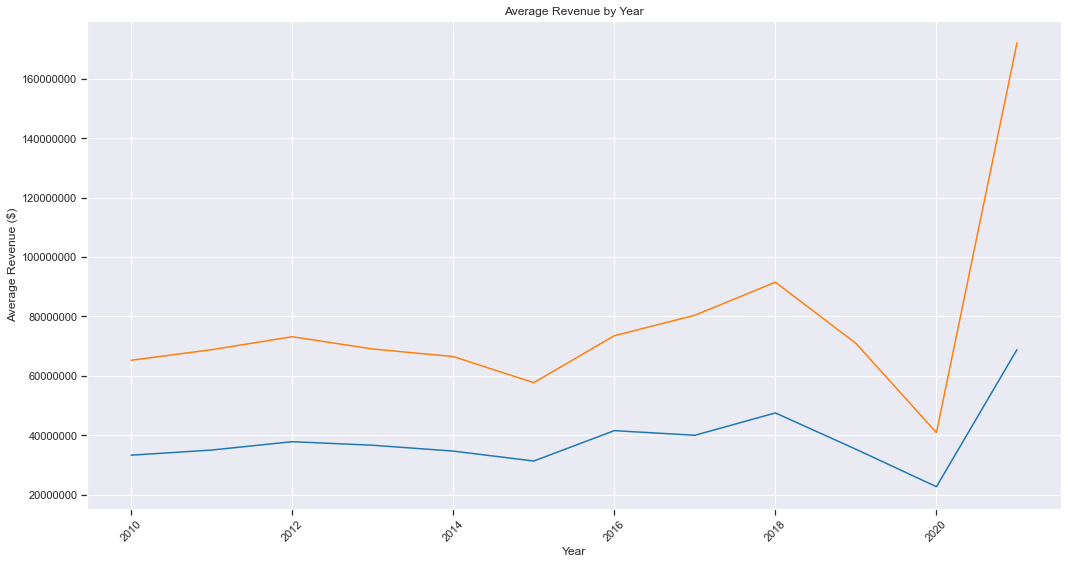

In [ ]:
# Setting plot style
plt.style.use('seaborn-darkgrid')
sns.set_context('notebook')

# Plotting average revenue trends by year
# Plot figure
plt.figure(figsize=(15, 8))

# plotting a line graph
sns.lineplot(data= revenue_dist, x='start_year', y='domestic_gross($)', estimator='mean', ci=None)
sns.lineplot(data= revenue_dist, x='start_year', y='worldwide_gross($)', estimator='mean', ci=None)

# Setting titles and labels
plt.title('Average Revenue by Year')
plt.ylabel('Average Revenue ($)')
plt.xlabel('Year')

# Other settings.
plt.xticks(rotation=45)
plt.ticklabel_format(style= 'plain')
plt.tight_layout()
plt.show()

#### Movies with the highest revenues


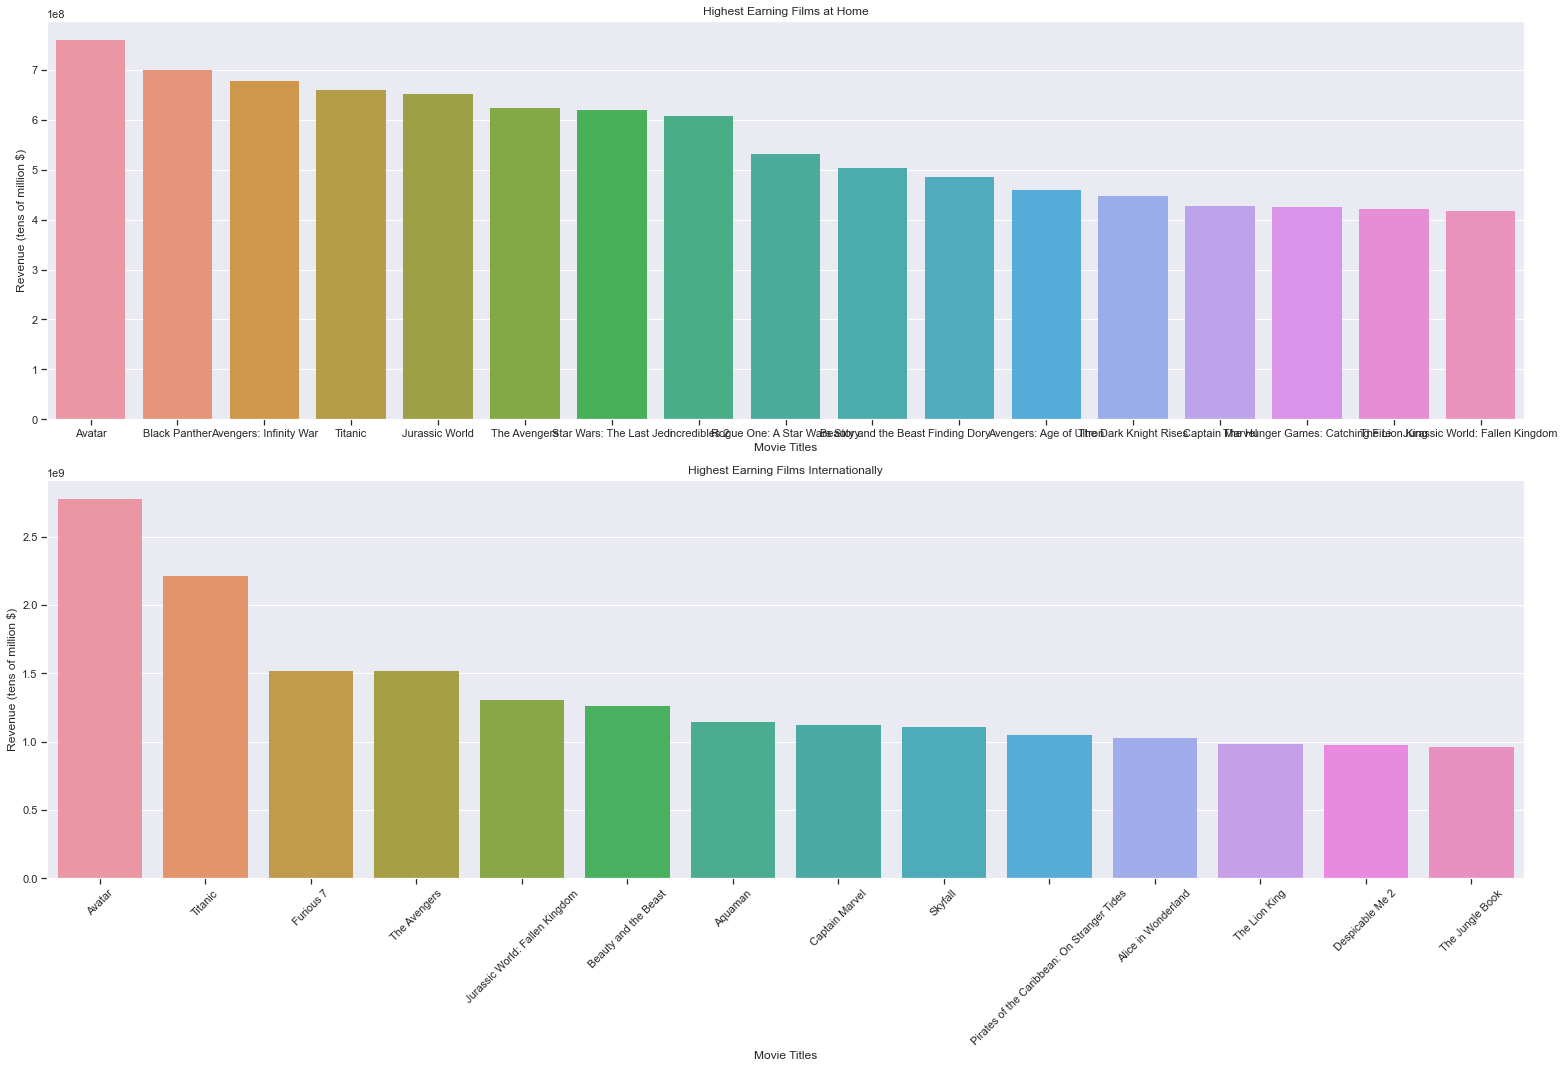

In [ ]:
# plotting the highest earning films both domestic and foreign
# preparing data for plotting
domestic_revs = revenue_dist[['primary_title', 'domestic_gross($)']].sort_values(by= 'domestic_gross($)', ascending= False)
foreign_revs = revenue_dist[['primary_title', 'worldwide_gross($)']].sort_values(by= 'worldwide_gross($)', ascending= False)

title_dom = list(domestic_revs['primary_title'])
dom_gross = list(domestic_revs['domestic_gross($)'])

title_foreign = list(foreign_revs['primary_title'])
foreign_gross = list(foreign_revs['worldwide_gross($)'])

ax1_x = title_dom[:20]
ax1_y = dom_gross[:20]

ax2_x = title_foreign[:20]
ax2_y = foreign_gross[:20]

# setting titles and labels
title1 = 'Highest Earning Films at Home'
title2 = 'Highest Earning Films Internationally'

labely = 'Revenue (tens of million $)'
labelx = 'Movie Titles'

# plotting
fig, (ax1, ax2) = plt.subplots(figsize= (22, 15), nrows= 2)

sns.barplot(x= ax1_x, y= ax1_y, ax= ax1)
sns.barplot(x= ax2_x, y= ax2_y, ax= ax2)

# Setting titles and labels
ax1.set_title(title1)
ax1.set_ylabel(labely)
ax1.set_xlabel(labelx)

ax2.set_title(title2)
ax2.set_ylabel(labely)
ax2.set_xlabel(labelx)

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Directors associated with low-budget and high-performing films.


In [ ]:
directors_data = pd.read_sql('''SELECT *
                                FROM directors
                                JOIN persons
                                USING(person_id)
                                ''', conn)

In [ ]:
directors_data

,movie_id,person_id,primary_name,primary_profession
0,tt0285252,nm0899854,Tony Vitale,"producer,director,writer"
1,tt0462036,nm1940585,Bill Haley,"director,writer,producer"
2,tt0835418,nm0151540,Jay Chandrasekhar,"director,actor,writer"
3,tt0878654,nm0089502,Albert Pyun,"director,writer,producer"
4,tt0878654,nm2291498,Joe Baile,"producer,director,camera_department"
...,...,...,...,...
161911,tt8999974,nm10122357,Daysi Burbano,"director,writer,cinematographer"
161912,tt9001390,nm6711477,Bernard Lessa,"director,writer,cinematographer"
161913,tt9001494,nm10123242,Tate Nova,"director,producer"
161914,tt9001494,nm10123248,Courtney Faye Powell,"director,producer"


In [ ]:
film_directors = revenue_dist.merge(directors_data, on= 'movie_id', how= 'left')
film_directors

,movie_id,primary_title,start_year,domestic_gross($),worldwide_gross($),person_id,primary_name,primary_profession
0,tt0435761,Toy Story 3,2010,415000000.0,652000000.0,nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous"
1,tt0892791,Shrek Forever After,2010,238700000.0,513900000.0,nm0593610,Mike Mitchell,"actor,director,writer"
2,tt1325004,The Twilight Saga: Eclipse,2010,300500000.0,398000000.0,nm1720541,David Slade,"producer,director,writer"
3,tt0398286,Tangled,2010,200800000.0,391000000.0,nm1977355,Nathan Greno,"actor,art_department,director"
4,tt0398286,Tangled,2010,200800000.0,391000000.0,nm0397174,Byron Howard,"animation_department,director,actor"
...,...,...,...,...,...,...,...,...
4542,tt1872026,Cure,2011,94596.0,94596.0,nm0948107,Bill Yip,"assistant_director,producer,actor"
4543,tt1880418,Newlyweds,2011,4584.0,4584.0,nm0122653,Edward Burns,"actor,writer,producer"
4544,tt7837402,Red 11,2019,0.0,0.0,nm0001675,Robert Rodriguez,"producer,writer,director"
4545,tt2107644,A Plague So Pleasant,2013,0.0,0.0,nm4766951,Benjamin Roberds,"camera_department,director,writer"


In [ ]:
film_directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4547 entries, 0 to 4546
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            4547 non-null   object 
 1   primary_title       4547 non-null   object 
 2   start_year          4547 non-null   int64  
 3   domestic_gross($)   4547 non-null   float64
 4   worldwide_gross($)  4547 non-null   float64
 5   person_id           4450 non-null   object 
 6   primary_name        4450 non-null   object 
 7   primary_profession  4450 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 319.7+ KB


In [ ]:
film_directors =  film_directors.dropna(subset= ['person_id', 'primary_name', 'primary_profession'])

# We are running this code to ensure that there are no null values.
missing = revenue_dist.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

we are going to decide a threshhold upon which if a movie revenue passes it, we shall consider it a high revenue. Then we will filter the directors data hapo and write a code that will create a dict of that data, then visualize it, the most appearing persons kwa hio data will be part of the crew.

The threshhold ni 75 quartile.

In [ ]:
high_rev_threshhold_domestic = film_directors['domestic_gross($)'].quantile(0.80)
high_rev_threshhold_domestic

55011732.0

In [ ]:
high_rev_threshhold_foreign = film_directors['worldwide_gross($)'].quantile(0.80)
high_rev_threshhold_foreign

89538661.80000006

In [ ]:
# Filter data to contain films that are in the 75th quantile.
high_rev = film_directors[(film_directors['domestic_gross($)'] > high_rev_threshhold_domestic) & (film_directors['worldwide_gross($)'] > high_rev_threshhold_foreign)]

high_rev = high_rev[['primary_name', 'primary_title', 'domestic_gross($)']]

high_rev

,primary_name,primary_title,domestic_gross($)
0,Lee Unkrich,Toy Story 3,415000000.0
1,Mike Mitchell,Shrek Forever After,238700000.0
2,David Slade,The Twilight Saga: Eclipse,300500000.0
3,Nathan Greno,Tangled,200800000.0
4,Byron Howard,Tangled,200800000.0
...,...,...,...
4114,Karthik Chandan,Snow White and the Seven Dwarfs,184925486.0
4115,Paul Hendy,Snow White and the Seven Dwarfs,184925486.0
4176,Sujit Mondal,Rocky,117235147.0
4177,Adnan A. Shaikh,Rocky,117235147.0


In [ ]:
z = list(high_rev['primary_name'])

directors_count1 = {}
for x in z:
    if x not in directors_count1:
        directors_count1[x] = 1
    else:
        directors_count1[x] += 1

director_tuple1 = list(directors_count1.items())
director_tuple_sorted1 = sorted(director_tuple1, key= lambda x: x[1], reverse= True)

final_data1 = director_tuple_sorted1[:20]


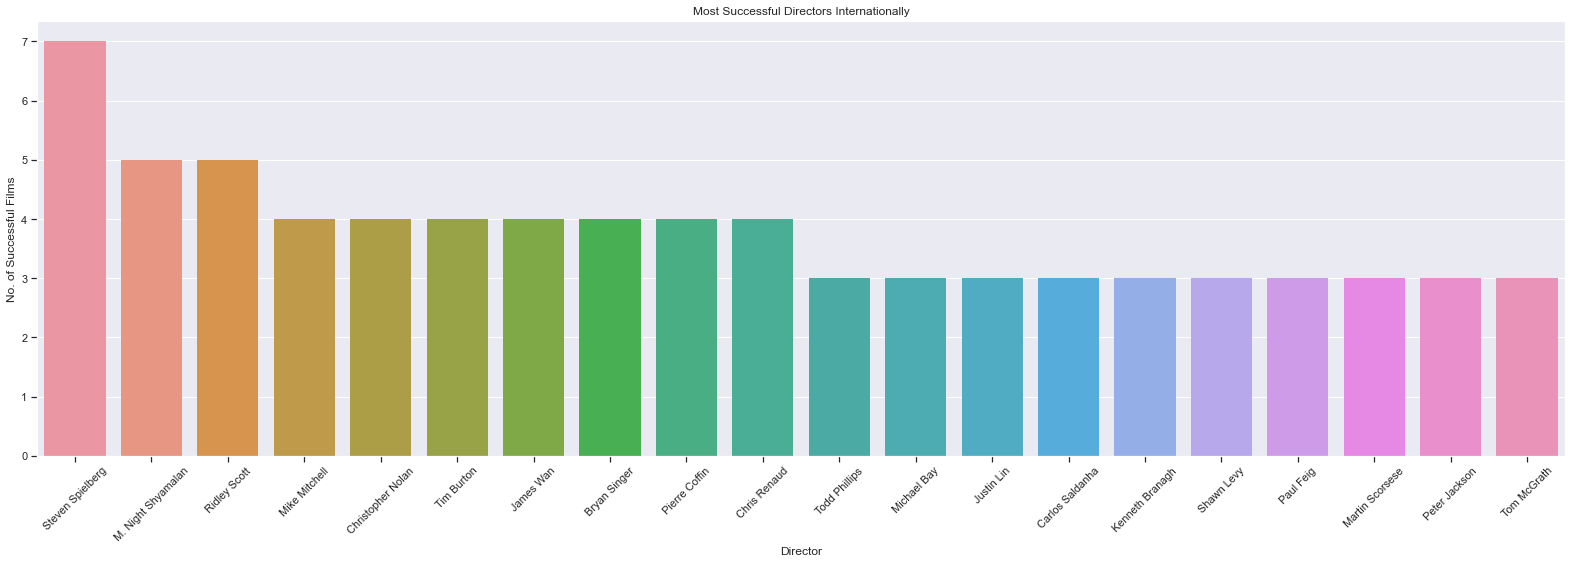

In [ ]:
# plotting most succeful directors internationally
# Preparing data
count = [x[1] for x in final_data1]
name = [x[0] for x in final_data1]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Successful Directors Internationally')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Director')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Movies with high earnings but with low budget

In [ ]:
production_budgets = pd.read_sql('''SELECT *
                                    FROM production_budgets''', conn)

production_budgets

,movie,production_budget($)
0,Avatar,425000000
1,Pirates of the Caribbean: On Stranger Tides,410600000
2,Dark Phoenix,350000000
3,Avengers: Age of Ultron,330600000
4,Star Wars Ep. VIII: The Last Jedi,317000000
...,...,...
5777,Red 11,7000
5778,Following,6000
5779,Return to the Land of Wonders,5000
5780,A Plague So Pleasant,1400


In [ ]:
production_budgets.rename(columns={'movie': 'primary_title'}, inplace= True)

In [ ]:
low_budget_thresh = production_budgets['production_budget($)'].quantile(0.40)
low_budget_thresh

11000000.0

In [ ]:
directors_budget = high_rev.merge(production_budgets, on= 'primary_title', how= 'left')
directors_budget

,primary_name,primary_title,domestic_gross($),production_budget($)
0,Lee Unkrich,Toy Story 3,415000000.0,200000000.0
1,Mike Mitchell,Shrek Forever After,238700000.0,165000000.0
2,David Slade,The Twilight Saga: Eclipse,300500000.0,68000000.0
3,Nathan Greno,Tangled,200800000.0,260000000.0
4,Byron Howard,Tangled,200800000.0,260000000.0
...,...,...,...,...
785,Karthik Chandan,Snow White and the Seven Dwarfs,184925486.0,1488000.0
786,Paul Hendy,Snow White and the Seven Dwarfs,184925486.0,1488000.0
787,Sujit Mondal,Rocky,117235147.0,1000000.0
788,Adnan A. Shaikh,Rocky,117235147.0,1000000.0


In [ ]:
directors_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 0 to 789
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   primary_name          790 non-null    object 
 1   primary_title         790 non-null    object 
 2   domestic_gross($)     790 non-null    float64
 3   production_budget($)  768 non-null    float64
dtypes: float64(2), object(2)
memory usage: 30.9+ KB


In [ ]:
low_budget_high_rev = directors_budget[directors_budget['production_budget($)'] < low_budget_thresh]
low_budget_high_rev

,primary_name,primary_title,domestic_gross($),production_budget($)
14,Tod Williams,Paranormal Activity 2,84800000.0,3000000.0
40,Ariel Schulman,Paranormal Activity 3,104000000.0,5000000.0
41,Henry Joost,Paranormal Activity 3,104000000.0,5000000.0
145,John R. Leonetti,Annabelle,84300000.0,6500000.0
255,Jamie Buckner,Split,138300000.0,5000000.0
...,...,...,...,...
785,Karthik Chandan,Snow White and the Seven Dwarfs,184925486.0,1488000.0
786,Paul Hendy,Snow White and the Seven Dwarfs,184925486.0,1488000.0
787,Sujit Mondal,Rocky,117235147.0,1000000.0
788,Adnan A. Shaikh,Rocky,117235147.0,1000000.0


In [ ]:
Q = list(low_budget_high_rev['primary_name'])

directors_count0 = {}
for x in Q:
    if x not in directors_count0:
        directors_count0[x] = 1
    else:
        directors_count0[x] += 1

director_tuple0 = list(directors_count0.items())
director_tuple_sorted0 = sorted(director_tuple0, key= lambda x: x[1], reverse= True)

final_data0 = director_tuple_sorted0[:20]

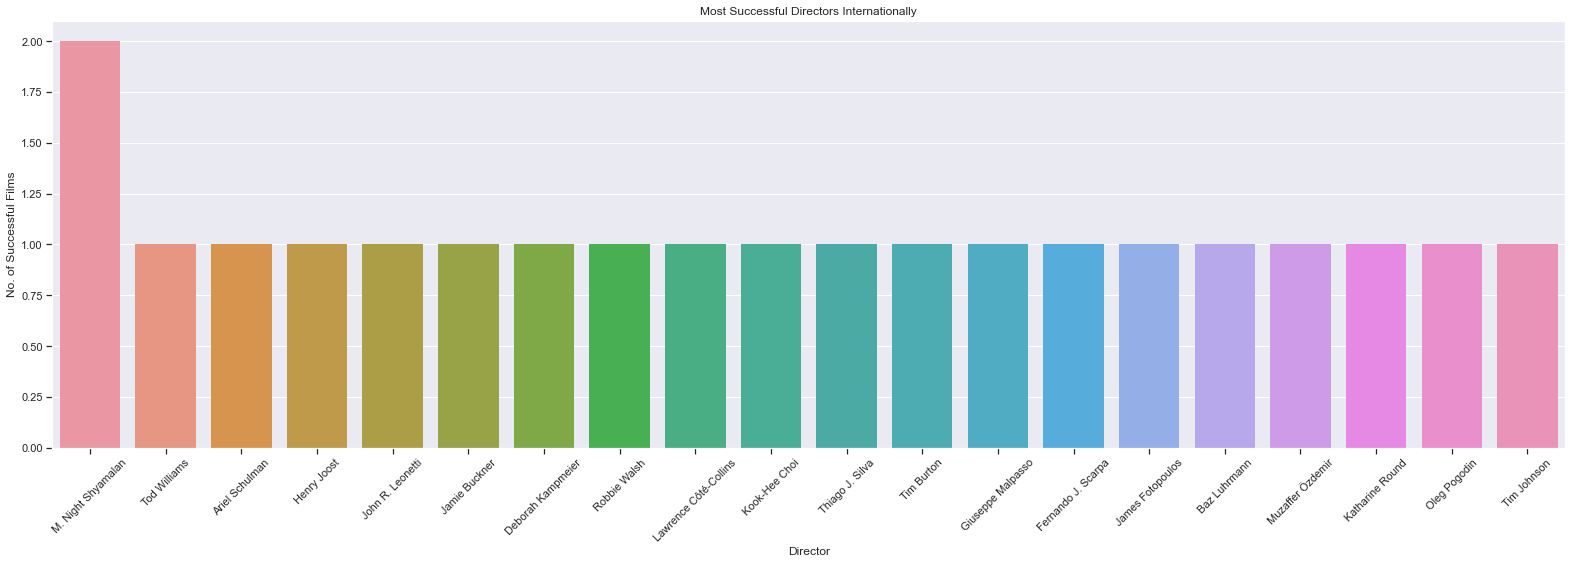

In [ ]:
# plotting most succeful directors internationally
# Preparing data
count = [x[1] for x in final_data0]
name = [x[0] for x in final_data0]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Successful Directors Internationally')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Director')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
low_budget_high_rev['High_rev'] = low_budget_high_rev['primary_name'].isin(high_rev['primary_name'])
low_budget_high_rev

<ipython-input-561-0d74d339f413>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_budget_high_rev['High_rev'] = low_budget_high_rev['primary_name'].isin(high_rev['primary_name'])


,primary_name,primary_title,domestic_gross($),production_budget($),High_rev
14,Tod Williams,Paranormal Activity 2,84800000.0,3000000.0,True
40,Ariel Schulman,Paranormal Activity 3,104000000.0,5000000.0,True
41,Henry Joost,Paranormal Activity 3,104000000.0,5000000.0,True
145,John R. Leonetti,Annabelle,84300000.0,6500000.0,True
255,Jamie Buckner,Split,138300000.0,5000000.0,True
...,...,...,...,...,...
785,Karthik Chandan,Snow White and the Seven Dwarfs,184925486.0,1488000.0,True
786,Paul Hendy,Snow White and the Seven Dwarfs,184925486.0,1488000.0,True
787,Sujit Mondal,Rocky,117235147.0,1000000.0,True
788,Adnan A. Shaikh,Rocky,117235147.0,1000000.0,True


In [ ]:
# exceptional_directors = []
# for x[0] in final_data:
#     if x[0] in final_data0:
#         exceptional_directors.append(x[0])


# for dir in final_data1:
#     if dir in final_data0:
#         exceptional_directors.append(dir)
#     else:
#         continue

''' WE SHALL REVISIT LATER'''

[]

### Actors whose presence significantly correlates with high box office returns, suggesting their "selling power" or popularity.

In [ ]:
actors = pd.read_sql('''SELECT *
                        FROM actors_and_actresses''', conn)
actors

,movie_id,ordering,person_id,category,characters
0,tt0111414,1,nm0246005,actor,"[""The Man""]"
1,tt0323808,1,nm3579312,actress,"[""Beth Boothby""]"
2,tt0323808,2,nm2694680,actor,"[""Steve Thomson""]"
3,tt0323808,3,nm0574615,actor,"[""Sir Lachlan Morrison""]"
4,tt0323808,4,nm0502652,actress,"[""Lady Delia Morrison""]"
...,...,...,...,...,...
390437,tt9681728,4,nm10436662,actor,"[""Alexey""]"
390438,tt9681728,8,nm10436663,actor,"[""Makar Petrovich""]"
390439,tt9681728,9,nm10397910,actor,"[""Corpsman""]"
390440,tt9692684,1,nm0186469,actor,"[""Ebenezer Scrooge""]"


In [ ]:
popular_movies = revenue_dist.merge(actors, on= 'movie_id', how= 'left')
popular_movies

,movie_id,primary_title,start_year,domestic_gross($),worldwide_gross($),ordering,person_id,category,characters
0,tt0435761,Toy Story 3,2010,415000000.0,652000000.0,1.0,nm0000158,actor,"[""Woody""]"
1,tt0435761,Toy Story 3,2010,415000000.0,652000000.0,2.0,nm0000741,actor,"[""Buzz Lightyear""]"
2,tt0435761,Toy Story 3,2010,415000000.0,652000000.0,3.0,nm0000349,actress,"[""Jessie""]"
3,tt0435761,Toy Story 3,2010,415000000.0,652000000.0,4.0,nm0000885,actor,"[""Lotso""]"
4,tt0892791,Shrek Forever After,2010,238700000.0,513900000.0,1.0,nm0000196,actor,"[""Shrek""]"
...,...,...,...,...,...,...,...,...,...
14647,tt7837402,Red 11,2019,0.0,0.0,3.0,nm7743734,actor,"[""Spoiler""]"
14648,tt7837402,Red 11,2019,0.0,0.0,4.0,nm6197744,actress,"[""Jasmine Camacho""]"
14649,tt2107644,A Plague So Pleasant,2013,0.0,0.0,1.0,nm4572412,actress,"[""Mia Marshall""]"
14650,tt2107644,A Plague So Pleasant,2013,0.0,0.0,2.0,nm4767160,actor,"[""Clay Marshall""]"


In [ ]:
actor_names = pd.read_sql('''SELECT *
                             FROM persons''', conn)
actor_names

,person_id,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"
...,...,...,...
549312,nm9990381,Susan Grobes,actress
549313,nm9990690,Joo Yeon So,actress
549314,nm9991320,Madeline Smith,actress
549315,nm9991786,Michelle Modigliani,producer


In [ ]:
actor_names['is_an_actor'] = actor_names['person_id'].isin(popular_movies['person_id'])
actor_names

,person_id,primary_name,primary_profession,is_an_actor
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer",False
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department",False
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer",False
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department",False
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator",False
...,...,...,...,...
549312,nm9990381,Susan Grobes,actress,False
549313,nm9990690,Joo Yeon So,actress,False
549314,nm9991320,Madeline Smith,actress,False
549315,nm9991786,Michelle Modigliani,producer,False


In [ ]:
actor_names = actor_names[actor_names['is_an_actor'] == True]
actor_names = actor_names[['person_id', 'primary_name']]


KeyError: 'is_an_actor'

In [ ]:
actor_names

,person_id,primary_name
86,nm0093589,Matt Bomer
174,nm0122703,James C. Burns
180,nm0124502,Mathieu Bisson
183,nm0125588,Agata Buzek
219,nm0138701,Valentina Carnelutti
...,...,...
548850,nm9350576,Indhuja
548888,nm9371534,Jenna Sarah
549194,nm9760820,Avery Susemichel
549195,nm9760821,Keegan Lawhead


In [ ]:
popular_movies = popular_movies.merge(actor_names, on= 'person_id', how= 'left')
popular_movies

KeyError: 'person_id'

In [ ]:
popular_movies = popular_movies[['primary_title', 'domestic_gross($)', 'worldwide_gross($)', 'category', 'characters', 'primary_name']]
popular_movies = popular_movies[(popular_movies['domestic_gross($)'] > high_rev_threshhold_domestic) & (popular_movies['worldwide_gross($)'] > high_rev_threshhold_foreign)]

KeyError: "['category'] not in index"

In [ ]:
popular_movies

,primary_title,domestic_gross($),worldwide_gross($),characters,primary_name
0,Toy Story 3,415000000.0,652000000.0,"[""Woody""]",Tom Hanks
1,Toy Story 3,415000000.0,652000000.0,"[""Buzz Lightyear""]",Tim Allen
2,Toy Story 3,415000000.0,652000000.0,"[""Jessie""]",Joan Cusack
3,Toy Story 3,415000000.0,652000000.0,"[""Lotso""]",Ned Beatty
4,Shrek Forever After,238700000.0,513900000.0,"[""Shrek""]",Mike Myers
...,...,...,...,...,...
13304,Snow White and the Seven Dwarfs,184925486.0,184925486.0,"[""Nurse Nellie""]",Ben Roddy
13305,Snow White and the Seven Dwarfs,184925486.0,184925486.0,"[""Queen Ivannah""]",Rita Simons
13465,Rocky,117235147.0,225000000.0,NaN,NaN
13466,Rocky,117235147.0,225000000.0,NaN,NaN


In [ ]:
popular_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 13744
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primary_title       2258 non-null   object 
 1   domestic_gross($)   2258 non-null   float64
 2   worldwide_gross($)  2258 non-null   float64
 3   characters          2186 non-null   object 
 4   primary_name        2101 non-null   object 
dtypes: float64(2), object(3)
memory usage: 105.8+ KB


In [ ]:
popular_movies.dropna(inplace=True)

In [ ]:
popular_movies

,primary_title,domestic_gross($),worldwide_gross($),characters,primary_name
0,Toy Story 3,415000000.0,652000000.0,"[""Woody""]",Tom Hanks
1,Toy Story 3,415000000.0,652000000.0,"[""Buzz Lightyear""]",Tim Allen
2,Toy Story 3,415000000.0,652000000.0,"[""Jessie""]",Joan Cusack
3,Toy Story 3,415000000.0,652000000.0,"[""Lotso""]",Ned Beatty
4,Shrek Forever After,238700000.0,513900000.0,"[""Shrek""]",Mike Myers
...,...,...,...,...,...
13301,Snow White and the Seven Dwarfs,184925486.0,184925486.0,"[""Prince Charming""]",Ben Carruthers
13302,Snow White and the Seven Dwarfs,184925486.0,184925486.0,"[""Muddles""]",Phil Gallagher
13303,Snow White and the Seven Dwarfs,184925486.0,184925486.0,"[""Snow White""]",Katie Monk
13304,Snow White and the Seven Dwarfs,184925486.0,184925486.0,"[""Nurse Nellie""]",Ben Roddy


In [ ]:
Q = list(popular_movies['primary_name'])

directors_count0 = {}
for x in Q:
    if x not in directors_count0:
        directors_count0[x] = 1
    else:
        directors_count0[x] += 1

director_tuple0 = list(directors_count0.items())
director_tuple_sorted0 = sorted(director_tuple0, key= lambda x: x[1], reverse= True)

final_data0 = director_tuple_sorted0[:20]

KeyError: 'actor'

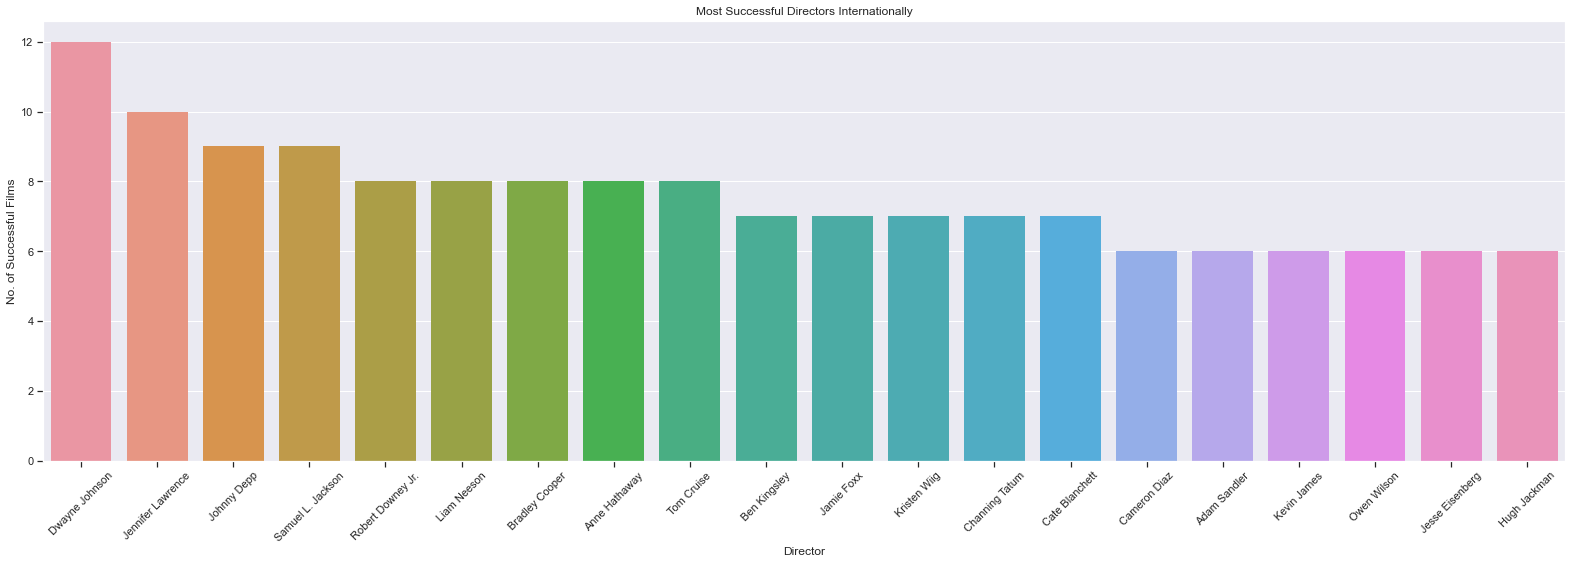

In [ ]:
# plotting most succeful directors internationally
# Preparing data
count = [x[1] for x in final_data0]
name = [x[0] for x in final_data0]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Successful Directors Internationally')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Director')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
popular_actors = popular_movies[popular_movies['category'] == 'actor']

Q = list(popular_actors['primary_name'])

directors_count0 = {}
for x in Q:
    if x not in directors_count0:
        directors_count0[x] = 1
    else:
        directors_count0[x] += 1

director_tuple0 = list(directors_count0.items())
director_tuple_sorted0 = sorted(director_tuple0, key= lambda x: x[1], reverse= True)

final_data0 = director_tuple_sorted0[:20]

In [ ]:
# plotting most succeful directors internationally
# Preparing data
count = [x[1] for x in final_data0]
name = [x[0] for x in final_data0]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Successful Directors Internationally')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Director')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
popular_actresses = popular_movies[popular_movies['category'] == 'actress']

Q = list(popular_actresses['primary_name'])

directors_count0 = {}
for x in Q:
    if x not in directors_count0:
        directors_count0[x] = 1
    else:
        directors_count0[x] += 1

director_tuple0 = list(directors_count0.items())
director_tuple_sorted0 = sorted(director_tuple0, key= lambda x: x[1], reverse= True)

final_data0 = director_tuple_sorted0[:20]


# plotting most succeful directors internationally
# Preparing data
count = [x[1] for x in final_data0]
name = [x[0] for x in final_data0]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Successful Directors Internationally')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Director')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Identify writers associated with high earning films.